# Tugas 2


**Penjelasan Outlier Deteksi dengan K-Nearest Neighbors (KNN) dalam Data Understanding**


**1.  Apa itu Outlier Deteksi?**

Outlier adalah data yang menyimpang jauh dari nilai-nilai lain dalam suatu dataset. Outlier bisa terjadi karena kesalahan dalam pengukuran atau bisa juga menunjukkan bahwa ada fenomena unik yang patut diteliti lebih lanjut
Outlier deteksi (atau deteksi outlier) adalah proses untuk mengidentifikasi data yang jauh berbeda atau menyimpang dari pola umum dalam sebuah dataset. Ada beberapa metode yang bisa digunakan untuk mendeteksi outlier, mulai dari teknik visualisasi sederhana hingga metode statistik yang lebih kompleks.

**2.  Kenapa KNN Bisa Digunakan untuk Deteksi Outlier**

KNN (K-Nearest Neighbors) bisa digunakan untuk deteksi outlier karena caranya yang intuitif dalam mengidentifikasi titik data yang tidak sesuai dengan data lainnya.

Misalkan, jika kita memiliki dataset dengan K=3, kita bisa menghitung jarak antara setiap titik data dan tiga tetangga terdekatnya. Jika rata-rata jarak tersebut melebihi ambang batas yang telah ditentukan, titik data tersebut bisa diklasifikasikan sebagai outlier


**3. Langkah-Langkah Deteksi Outlier dengan KNN**

a. Menentukan Jarak Antar Titik Data

Kita menggunakan metrik jarak seperti Euclidean Distance, Manhattan Distance, atau Minkowski Distance untuk mengukur jarak antara suatu titik dengan tetangga terdekatnya.

b. Menentukan K (Jumlah Tetangga Terdekat)

Nilai K yang dipilih akan menentukan seberapa banyak tetangga yang dipertimbangkan.

*  Jika K terlalu kecil, model bisa terlalu sensitif terhadap noise.

*  Jika K terlalu besar, outlier bisa terdeteksi secara kurang akurat.

c. Menghitung Skor Kepadatan (Density Score)

Ada beberapa pendekatan untuk mengukur apakah suatu titik adalah outlier:

1. K-Nearest Neighbor Distance

> Menghitung jarak rata-rata ke K tetangga terdekat. Jika jarak rata-rata terlalu besar, titik tersebut dianggap sebagai outlier.

2. Local Outlier Factor (LOF)

> LOF membandingkan kepadatan lokal suatu titik dengan kepadatan lokal tetangganya. Jika kepadatan lokal suatu titik lebih kecil dibandingkan dengan tetangganya, maka titik tersebut dianggap sebagai outlier.

3. Distance-Based Outlier Score

> Jika sebuah titik memiliki jumlah tetangga yang sangat sedikit dalam radius tertentu, maka kemungkinan besar titik tersebut adalah outlier.

4. Kelebihan dan Kekurangan Metode KNN untuk Deteksi Outlier

Kelebihan:

> Mudah dipahami karena berbasis jarak.

> Tidak memerlukan distribusi data tertentu, cocok untuk berbagai jenis dataset.

> Dapat digunakan pada data berdimensi tinggi.

Kekurangan:

> Biaya komputasi tinggi untuk dataset besar karena harus menghitung jarak ke banyak titik.
> Sensitif terhadap nilai K, pemilihan K yang tidak tepat bisa mengurangi akurasi deteksi outlier.

Kesimpulan

KNN dapat digunakan dalam tahap Data Understanding untuk mendeteksi outlier dengan menganalisis jarak antara suatu titik dengan tetangga terdekatnya. Dengan metode seperti K-Nearest Neighbor Distance dan Local Outlier Factor (LOF), kita dapat menandai data yang memiliki kepadatan rendah atau jauh dari data lainnya sebagai outlier. Pemilihan nilai K yang tepat dan metrik jarak yang sesuai menjadi faktor penting untuk keberhasilan deteksi outlier dengan KNN




In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.0 MB/s eta 0:00:00


# Penjelasan dan Langkah-langkah:

1. **%pip install pymysql**:
   - **%pip**: Merupakan magic command di Jupyter Notebook untuk menjalankan perintah pip dari dalam notebook.
   - **install pymysql**: Perintah pip untuk menginstal paket pymysql, yaitu modul Python yang digunakan untuk berinteraksi dengan database MySQL. Paket ini memungkinkan kamu untuk menghubungkan dan melakukan operasi database pada MySQL dari skrip Python kamu.

2. **%pip install psycopg2**:
   - **%pip**: Seperti sebelumnya, ini adalah magic command di Jupyter Notebook untuk menjalankan perintah pip.
   - **install psycopg2**: Perintah pip untuk menginstal paket psycopg2, yaitu driver PostgreSQL untuk bahasa pemrograman Python. Paket ini memungkinkan kamu untuk berinteraksi dengan database PostgreSQL dari skrip Python kamu.

Jadi, kedua perintah tersebut digunakan untuk menginstal pustaka yang diperlukan agar Python dapat berkomunikasi dengan database MySQL dan PostgreSQL. Setelah diinstal, kamu dapat menggunakan pustaka ini untuk membuat koneksi, menjalankan query, dan melakukan operasi lain pada database tersebut.

 id           class  petal length  petal width  sepal length  sepal width  distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5  4.482187    False
  2     Iris-setosa          14.0          2.0          40.9         30.0 45.476587     True
  3     Iris-setosa           1.3          0.2           4.7          3.2  4.588028    False
  4     Iris-setosa           1.5          0.2           4.6          3.1  4.403408    False
  5     Iris-setosa           1.4          0.2           5.0          3.6  4.491102    False
  6     Iris-setosa           1.7          0.4           5.4          3.9  4.213075    False
  7     Iris-setosa           1.4          0.3           4.6          3.4  4.487761    False
  8     Iris-setosa           1.5          0.2           5.0          3.4  4.379498    False
  9     Iris-setosa           1.4          0.2           4.4          2.9  4.536518    False
 10     Iris-setosa           1.5          0.1           4.9          

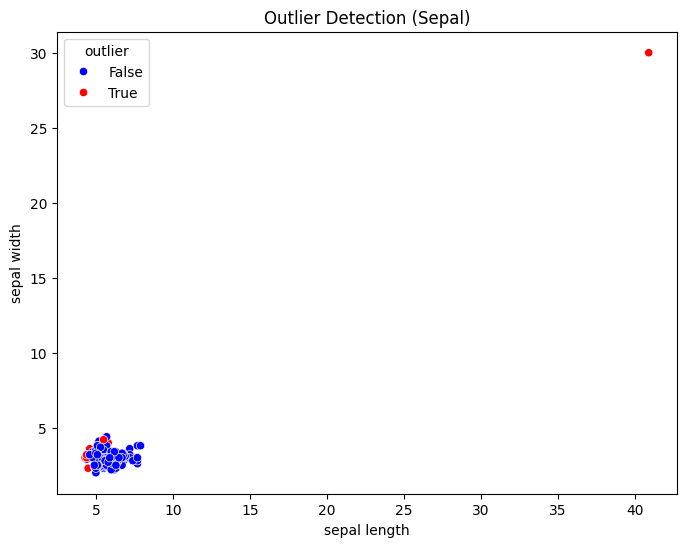

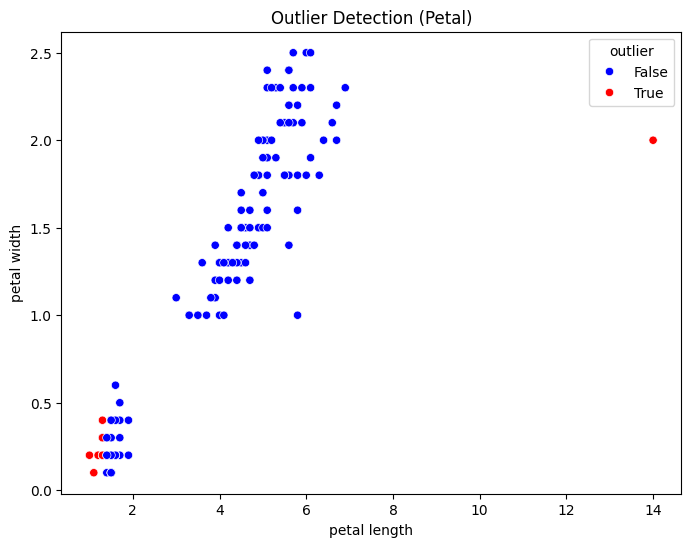

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-319a464f-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_EVJaXCw9MKrhLxoQcKj",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM lira.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-19018c16-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_rsy2_HLnOlER6ZAwLDN",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal length"], y=df_merged["sepal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal length"], y=df_merged["petal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()


# Penjelasan dan Langkah-langkah:

```
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
```

- Pada bagian ini, kita mengimpor pustaka yang dibutuhkan untuk mengakses database, memproses data, dan visualisasi.


```
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-319a464f-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_EVJaXCw9MKrhLxoQcKj",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM lira.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

```

Fungsi ini melakukan:

1. Membuat koneksi ke database PostgreSQL.

2. Menjalankan query untuk mengambil semua data dari tabel lira.postgree.

3. Mengambil data dan nama kolom, lalu menutup koneksi.

4. Mengembalikan data dalam bentuk DataFrame Pandas.


```
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-19018c16-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_rsy2_HLnOlER6ZAwLDN",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

```

- Fungsi ini untuk mengambil data dari MySQL, mirip dengan fungsi sebelumnya, tetapi untuk database MySQL dan tabel flowers.


```
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})
```

- Pada bagian ini, kita memanggil fungsi get_pg_data() dan get_mysql_data() untuk mengambil data dari kedua database. Kita juga mengganti nama kolom Class menjadi class di DataFrame PostgreSQL.


```
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")
```

- Menggabungkan kedua DataFrame berdasarkan kolom id dan class dengan menggunakan inner join


```
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merged[feature_columns].values
```

- Mengambil kolom fitur numerik yang akan digunakan untuk perhitungan jarak.


```
reference_point = data_values[-1]
```

- Mengambil titik referensi dari baris terakhir pada data.


```
def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])
```

- Fungsi ini menghitung jarak Euclidean antara setiap baris data dengan titik referensi.


```
df_merged["distance"] = compute_distances(data_values, reference_point)
```

- Menghitung jarak Euclidean dan menyimpannya dalam kolom baru distance.


```
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold
```

- Menentukan threshold outlier berdasarkan persentil ke-93.5 dan menandai baris yang jaraknya melebihi threshold sebagai outlier.


```
print(df_merged.to_string(index=False))
```

- Mencetak DataFrame dengan informasi outlier.


```
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal length"], y=df_merged["sepal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal length"], y=df_merged["petal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()
```

- Membuat scatter plot untuk visualisasi hasil deteksi outlier berdasarkan fitur sepal length dan sepal width, serta petal length dan petal width. Titik data yang dianggap outlier diberi warna merah.

In [3]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")

Total Outlier: 10


# Penjelasan dan Langkah-langkah:


1. Menghitung Total Outlier:

- total_outliers = df_merged["outlier"].sum(): Pada langkah ini, kita menjumlahkan nilai dalam kolom outlier dari DataFrame df_merged. Kolom outlier berisi nilai boolean True atau False, di mana True menunjukkan bahwa baris tersebut adalah outlier. Ketika kita menggunakan metode .sum() pada kolom boolean, nilai True dihitung sebagai 1 dan nilai False dihitung sebagai 0. Oleh karena itu, hasil penjumlahan akan memberikan total jumlah baris yang dianggap outlier.

2. Mencetak Total Outlier:

- print(f"Total Outlier: {total_outliers}"): Langkah ini mencetak jumlah total outlier yang telah dihitung ke output. Kita menggunakan format string (f-string) untuk menyisipkan nilai total_outliers ke dalam teks yang akan dicetak.

In [4]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width  distance  outlier
151           ?????           5.8          1.0           5.1          3.2  0.000000    False
135  Iris-virginica           5.6          1.4           6.1          2.6  1.249000    False
150  Iris-virginica           5.1          1.8           5.9          3.0  1.345362    False
 84 Iris-versicolor           5.1          1.6           6.0          2.7  1.382027    False
143  Iris-virginica           5.1          1.9           5.8          2.7  1.428286    False
102  Iris-virginica           5.1          1.9           5.8          2.7  1.428286    False
 85 Iris-versicolor           4.5          1.5           5.4          3.0  1.438749    False
104  Iris-virginica           5.6          1.8           6.3          2.9  1.486607    False
122  Iris-virginica           4.9          2.0           5.6          2.8  1.489966    False
 67 Iris-versicolor           4.5          1.5           5.6          

# Penjelasan dan Langkah-langkah:

1. Mengurutkan DataFrame Berdasarkan Kolom distance

- df_merged.sort_values(by="distance", ascending=True): Perintah ini mengurutkan DataFrame df_merged berdasarkan nilai dalam kolom distance secara menaik (ascending).

- Hasilnya adalah DataFrame baru df_sorted yang diurutkan berdasarkan jarak dari referensi. Baris dengan nilai jarak terkecil akan berada di awal DataFrame, sedangkan baris dengan nilai jarak terbesar akan berada di akhir.


2. Mencetak DataFrame yang Diurutkan:

- df_sorted.to_string(index=False): Perintah ini mengkonversi DataFrame df_sorted menjadi string dan mencetaknya tanpa menyertakan indeks baris.

- print(...): Fungsi print digunakan untuk mencetak DataFrame yang sudah diurutkan ke output.

Langkah-langkah ini memungkinkan kita untuk melihat data yang telah diurutkan berdasarkan kolom distance. Mengurutkan data ini berguna untuk analisis lebih lanjut, seperti mengidentifikasi titik-titik data yang memiliki jarak terdekat atau terjauh dari titik referensi

**Contoh Hasilnya:**

Setelah menjalankan kode ini, output yang dihasilkan akan menampilkan DataFrame df_sorted dengan kolom-kolom yang ada, dan baris-barisnya diurutkan berdasarkan nilai dalam kolom distance.